# Pengumpulan DataSet

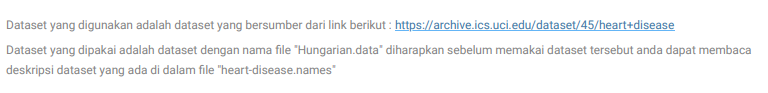

# Load Dataset

In [1]:
import pandas as pd
import re
import numpy as np
import itertools

In [2]:
dir = 'hungarian.data'

In [4]:
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

In [5]:
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10)))

df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

In [7]:
#ngelock column tanpa name di kolom terahkir
df = df.iloc[:,:-1]

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,1257,0,48,0,1,1,1,-9,4,138,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,1258,0,54,1,1,0,1,-9,3,150,...,-9,1,-9,1,1,1,1,1,-9.,-9.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,-9,1,1,1,1,1,-9.,-9.


In [10]:
#drop kolom pertama
df = df.drop(df.columns[0], axis=1)
df

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,0,48,0,1,1,1,-9,4,138,0,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,0,54,1,1,0,1,-9,3,150,0,...,-9,1,-9,1,1,1,1,1,-9.,-9.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0,48,0,0,0,0,-9,2,-9,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
290,0,36,1,1,0,0,-9,2,120,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
291,0,48,1,0,0,0,-9,3,110,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
292,0,47,0,0,0,0,-9,2,140,1,...,-9,-9,-9,1,1,1,1,1,-9.,-9.


In [11]:
#convert tipe data
df = df.astype(float)
df

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,-9.0,2.0,140.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,0.0,49.0,0.0,1.0,0.0,0.0,-9.0,3.0,160.0,1.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,0.0,37.0,1.0,1.0,0.0,0.0,-9.0,2.0,130.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
3,0.0,48.0,0.0,1.0,1.0,1.0,-9.0,4.0,138.0,0.0,...,-9.0,2.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,0.0,54.0,1.0,1.0,0.0,1.0,-9.0,3.0,150.0,0.0,...,-9.0,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.0,48.0,0.0,0.0,0.0,0.0,-9.0,2.0,-9.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
290,0.0,36.0,1.0,1.0,0.0,0.0,-9.0,2.0,120.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
291,0.0,48.0,1.0,0.0,0.0,0.0,-9.0,3.0,110.0,0.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
292,0.0,47.0,0.0,0.0,0.0,0.0,-9.0,2.0,140.0,1.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

# Validasi Data

In [15]:
#me replace -9.0 menjadi missing value (sesuai deskripsi dataset)
df.replace(-9.0, np.nan, inplace=True)

In [16]:
#meghitung nilai missing value
df.isna().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [17]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

# Menentukan Obejct Data